Scraping Data


In [45]:
!pip install google_play_scraper

# New Section

Import Paket

In [46]:
from google_play_scraper import app
import pandas as pd
import numpy as np


In [47]:
from google_play_scraper import Sort, reviews

result, continuation_token = reviews(
    'com.valar.pintu',
    lang='id',
    country='id',
    sort=Sort.MOST_RELEVANT,
    count=1000,
    filter_score_with=None
)

In [48]:
df_busu = pd.DataFrame(np.array(result),columns=['review'])

df_busu = df_busu.join(pd.DataFrame(df_busu.pop('review').tolist()))

df_busu.head()


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,ab6d5c2f-0a77-47c7-81d1-11cb840d2ca1,XRISKY RM,https://play-lh.googleusercontent.com/a-/ALV-U...,Aplikasi Pintu menurutku terbaik buat pemula m...,5,12,3.81.0,2025-09-24 14:11:52,Hi Teman Pintu! Terima kasih atas ulasannya. K...,2025-09-25 18:35:49,3.81.0
1,e48aa8d6-2238-461e-b35a-ec5f7bb129ac,Nanda Gunawan,https://play-lh.googleusercontent.com/a-/ALV-U...,"Tampilan aplikasi baik, masih banyak yg harus ...",2,15,3.80.0,2025-09-13 16:14:55,Hi Teman Pintu! Kami mohon maaf atas ketidakny...,2025-09-17 13:19:23,3.80.0
2,5021b3eb-f3fc-4663-92c9-1b30100c93e3,Agus Supriadi,https://play-lh.googleusercontent.com/a-/ALV-U...,Aplikasi pintu tetap menjadi pilihan investasi...,5,14,3.80.0,2025-09-10 16:18:49,Hi Teman Pintu! Terima kasih atas ulasannya. K...,2025-09-11 18:35:55,3.80.0
3,df0d7bb8-dca1-4abe-a2b0-7afa80cbdf7f,Luky Sanjaya,https://play-lh.googleusercontent.com/a-/ALV-U...,"dari banyaknya update, masih nunggu fitur PNL ...",5,44,3.80.0,2025-09-02 14:55:44,Hi Teman Pintu! Terima kasih atas ulasannya. K...,2025-09-03 18:30:31,3.80.0
4,c2b760c9-9b2d-4543-b35d-bfe149008ad6,Rizky Cowwrna,https://play-lh.googleusercontent.com/a-/ALV-U...,saya penguna pintu dari 1 tahun yg lalu untuk ...,4,0,3.81.0,2025-09-22 18:50:26,Hi Teman Pintu! Terima kasih atas ulasannya. K...,2025-09-23 21:15:30,3.81.0


In [49]:
len(df_busu.index)

1000

In [50]:
df_busu[['userName', 'score','at', 'content']].head()

,userName,score,at,content
0,XRISKY RM,5,2025-09-24 14:11:52,Aplikasi Pintu menurutku terbaik buat pemula m...
1,Nanda Gunawan,2,2025-09-13 16:14:55,"Tampilan aplikasi baik, masih banyak yg harus ..."
2,Agus Supriadi,5,2025-09-10 16:18:49,Aplikasi pintu tetap menjadi pilihan investasi...
3,Luky Sanjaya,5,2025-09-02 14:55:44,"dari banyaknya update, masih nunggu fitur PNL ..."
4,Rizky Cowwrna,4,2025-09-22 18:50:26,saya penguna pintu dari 1 tahun yg lalu untuk ...


In [51]:
new_df = df_busu[['userName', 'score','at', 'content']]
sorted_df = new_df.sort_values(by='at', ascending=False) #ngurutin dari data yang paling baru
sorted_df.head()

,userName,score,at,content
191,Zidan Albaghdadi,3,2025-09-26 21:19:14,perbedaan harga coin cukup mahal overal ok
671,Saeful Aminudin,1,2025-09-25 02:02:55,aplikasi busuk jangan di pake mau beli gk bisa...
28,muh. subhan wathan,4,2025-09-25 00:18:24,"lumayan bagus untuk investasi, gampang digunak..."
192,Ayam zuka,5,2025-09-24 19:02:43,aplikasi pintu untuk investasi jual dan beli c...
300,bocah pejuang,1,2025-09-24 18:22:15,pintu. sangat mengecewakan. proses withdrawal ...


In [52]:
my_df = sorted_df[['content', 'score']]
my_df.head()

,content,score
191,perbedaan harga coin cukup mahal overal ok,3
671,aplikasi busuk jangan di pake mau beli gk bisa...,1
28,"lumayan bagus untuk investasi, gampang digunak...",4
192,aplikasi pintu untuk investasi jual dan beli c...,5
300,pintu. sangat mengecewakan. proses withdrawal ...,1


Labeling data

In [53]:
def pelabelan(score):
  if score <= 3 :
    return 'Negatif'
  elif score == 4 :
    return 'Positif'
  elif score == 5 :
    return 'Positif'
my_df['Label'] = my_df ['score'].apply(pelabelan)
my_df.head(50)

/tmp/ipython-input-1972433805.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_df['Label'] = my_df ['score'].apply(pelabelan)


,content,score,Label
191,perbedaan harga coin cukup mahal overal ok,3,Negatif
671,aplikasi busuk jangan di pake mau beli gk bisa...,1,Negatif
28,"lumayan bagus untuk investasi, gampang digunak...",4,Positif
192,aplikasi pintu untuk investasi jual dan beli c...,5,Positif
300,pintu. sangat mengecewakan. proses withdrawal ...,1,Negatif
352,"Aplikasi bagus. Banget cuy, mudah dipahami seg...",5,Positif
695,ngak tau kenapa sy pilih app pintu..yg sy tahu...,5,Positif
283,Aplikasi Pintu beneran punya banyak fitur lho....,5,Positif
0,Aplikasi Pintu menurutku terbaik buat pemula m...,5,Positif
344,Dulu pintu bisa deposit 11.000 sekarang minima...,3,Negatif


Simpan data dalam bentuk csv


In [54]:
my_df.to_csv("scrapped_data.csv", index = False)

Data Cleaning

In [55]:
import pandas as pd
pd.set_option('display.max_columns', None)
my_df = pd.read_csv('/content/scrapped_data.csv')
my_df.head(50)

,content,score,Label
0,perbedaan harga coin cukup mahal overal ok,3,Negatif
1,aplikasi busuk jangan di pake mau beli gk bisa...,1,Negatif
2,"lumayan bagus untuk investasi, gampang digunak...",4,Positif
3,aplikasi pintu untuk investasi jual dan beli c...,5,Positif
4,pintu. sangat mengecewakan. proses withdrawal ...,1,Negatif
5,"Aplikasi bagus. Banget cuy, mudah dipahami seg...",5,Positif
6,ngak tau kenapa sy pilih app pintu..yg sy tahu...,5,Positif
7,Aplikasi Pintu beneran punya banyak fitur lho....,5,Positif
8,Aplikasi Pintu menurutku terbaik buat pemula m...,5,Positif
9,Dulu pintu bisa deposit 11.000 sekarang minima...,3,Negatif


In [56]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  1000 non-null   object
 1   score    1000 non-null   int64 
 2   Label    1000 non-null   object
dtypes: int64(1), object(2)
memory usage: 23.6+ KB


In [57]:
my_df.isna()

,content,score,Label
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
995,False,False,False
996,False,False,False
997,False,False,False
998,False,False,False


Handling Missing Value

In [58]:
my_df.dropna(subset=['Label'],inplace = True)


In [59]:
my_df.isna().any()

,0
content,False
score,False
Label,False


In [60]:
my_df.isnull().sum()

,0
content,0
score,0
Label,0


In [61]:
my_df["Label"].value_counts()

,count
Label,
Positif,746
Negatif,254


In [62]:
my_df.to_csv("pintupreprocessing.csv", index = False)

Text PreProcessing

In [63]:
import pandas as pd
df = pd.read_csv('/content/pintupreprocessing.csv')
df.head(50)

,content,score,Label
0,perbedaan harga coin cukup mahal overal ok,3,Negatif
1,aplikasi busuk jangan di pake mau beli gk bisa...,1,Negatif
2,"lumayan bagus untuk investasi, gampang digunak...",4,Positif
3,aplikasi pintu untuk investasi jual dan beli c...,5,Positif
4,pintu. sangat mengecewakan. proses withdrawal ...,1,Negatif
5,"Aplikasi bagus. Banget cuy, mudah dipahami seg...",5,Positif
6,ngak tau kenapa sy pilih app pintu..yg sy tahu...,5,Positif
7,Aplikasi Pintu beneran punya banyak fitur lho....,5,Positif
8,Aplikasi Pintu menurutku terbaik buat pemula m...,5,Positif
9,Dulu pintu bisa deposit 11.000 sekarang minima...,3,Negatif


Case Folding(mengubah huruf kapital menjadi huruf kecil)

In [64]:
import re
def  clean_text(df, text_field, new_text_field_name):
    my_df[new_text_field_name] = my_df[text_field].str.lower()
    my_df[new_text_field_name] = my_df[new_text_field_name].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))
    # remove numbers
    my_df[new_text_field_name] = my_df[new_text_field_name].apply(lambda elem: re.sub(r"\d+", "", elem))
    return my_df

In [65]:
my_df['text_clean'] = my_df['content'].str.lower()
my_df['text_clean']
data_clean = clean_text(my_df, 'content', 'text_clean')
data_clean.head(50)

,content,score,Label,text_clean
0,perbedaan harga coin cukup mahal overal ok,3,Negatif,perbedaan harga coin cukup mahal overal ok
1,aplikasi busuk jangan di pake mau beli gk bisa...,1,Negatif,aplikasi busuk jangan di pake mau beli gk bisa...
2,"lumayan bagus untuk investasi, gampang digunak...",4,Positif,lumayan bagus untuk investasi gampang digunaka...
3,aplikasi pintu untuk investasi jual dan beli c...,5,Positif,aplikasi pintu untuk investasi jual dan beli c...
4,pintu. sangat mengecewakan. proses withdrawal ...,1,Negatif,pintu sangat mengecewakan proses withdrawal cr...
5,"Aplikasi bagus. Banget cuy, mudah dipahami seg...",5,Positif,aplikasi bagus banget cuy mudah dipahami segal...
6,ngak tau kenapa sy pilih app pintu..yg sy tahu...,5,Positif,ngak tau kenapa sy pilih app pintuyg sy tahu a...
7,Aplikasi Pintu beneran punya banyak fitur lho....,5,Positif,aplikasi pintu beneran punya banyak fitur lho ...
8,Aplikasi Pintu menurutku terbaik buat pemula m...,5,Positif,aplikasi pintu menurutku terbaik buat pemula m...
9,Dulu pintu bisa deposit 11.000 sekarang minima...,3,Negatif,dulu pintu bisa deposit sekarang minimal haru...


Stopword Removal

In [66]:
import nltk.corpus
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('indonesian')
data_clean['text_StopWord'] = data_clean['text_clean'].apply(lambda x:' '.join([word for word in x.split() if word not in (stop)]))
data_clean.head(50)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,content,score,Label,text_clean,text_StopWord
0,perbedaan harga coin cukup mahal overal ok,3,Negatif,perbedaan harga coin cukup mahal overal ok,perbedaan harga coin mahal overal ok
1,aplikasi busuk jangan di pake mau beli gk bisa...,1,Negatif,aplikasi busuk jangan di pake mau beli gk bisa...,aplikasi busuk pake beli gk tanfers gk mlah ng...
2,"lumayan bagus untuk investasi, gampang digunak...",4,Positif,lumayan bagus untuk investasi gampang digunaka...,lumayan bagus investasi gampang pilihan aset c...
3,aplikasi pintu untuk investasi jual dan beli c...,5,Positif,aplikasi pintu untuk investasi jual dan beli c...,aplikasi pintu investasi jual beli crypto terp...
4,pintu. sangat mengecewakan. proses withdrawal ...,1,Negatif,pintu sangat mengecewakan proses withdrawal cr...,pintu mengecewakan proses withdrawal crypto
5,"Aplikasi bagus. Banget cuy, mudah dipahami seg...",5,Positif,aplikasi bagus banget cuy mudah dipahami segal...,aplikasi bagus banget cuy mudah dipahami macem
6,ngak tau kenapa sy pilih app pintu..yg sy tahu...,5,Positif,ngak tau kenapa sy pilih app pintuyg sy tahu a...,ngak tau sy pilih app pintuyg sy aman dam muda...
7,Aplikasi Pintu beneran punya banyak fitur lho....,5,Positif,aplikasi pintu beneran punya banyak fitur lho ...,aplikasi pintu beneran fitur lho jualbeli cryp...
8,Aplikasi Pintu menurutku terbaik buat pemula m...,5,Positif,aplikasi pintu menurutku terbaik buat pemula m...,aplikasi pintu menurutku terbaik pemula crypto...
9,Dulu pintu bisa deposit 11.000 sekarang minima...,3,Negatif,dulu pintu bisa deposit sekarang minimal haru...,pintu deposit minimal rp jual mahal niye


Tokenizing

In [67]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab') # Download the 'punkt_tab' resource
from nltk.tokenize import sent_tokenize, word_tokenize
data_clean['text_tokens'] = data_clean['text_StopWord'].apply(lambda x: word_tokenize(x))
data_clean.head(50)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,content,score,Label,text_clean,text_StopWord,text_tokens
0,perbedaan harga coin cukup mahal overal ok,3,Negatif,perbedaan harga coin cukup mahal overal ok,perbedaan harga coin mahal overal ok,"[perbedaan, harga, coin, mahal, overal, ok]"
1,aplikasi busuk jangan di pake mau beli gk bisa...,1,Negatif,aplikasi busuk jangan di pake mau beli gk bisa...,aplikasi busuk pake beli gk tanfers gk mlah ng...,"[aplikasi, busuk, pake, beli, gk, tanfers, gk,..."
2,"lumayan bagus untuk investasi, gampang digunak...",4,Positif,lumayan bagus untuk investasi gampang digunaka...,lumayan bagus investasi gampang pilihan aset c...,"[lumayan, bagus, investasi, gampang, pilihan, ..."
3,aplikasi pintu untuk investasi jual dan beli c...,5,Positif,aplikasi pintu untuk investasi jual dan beli c...,aplikasi pintu investasi jual beli crypto terp...,"[aplikasi, pintu, investasi, jual, beli, crypt..."
4,pintu. sangat mengecewakan. proses withdrawal ...,1,Negatif,pintu sangat mengecewakan proses withdrawal cr...,pintu mengecewakan proses withdrawal crypto,"[pintu, mengecewakan, proses, withdrawal, crypto]"
5,"Aplikasi bagus. Banget cuy, mudah dipahami seg...",5,Positif,aplikasi bagus banget cuy mudah dipahami segal...,aplikasi bagus banget cuy mudah dipahami macem,"[aplikasi, bagus, banget, cuy, mudah, dipahami..."
6,ngak tau kenapa sy pilih app pintu..yg sy tahu...,5,Positif,ngak tau kenapa sy pilih app pintuyg sy tahu a...,ngak tau sy pilih app pintuyg sy aman dam muda...,"[ngak, tau, sy, pilih, app, pintuyg, sy, aman,..."
7,Aplikasi Pintu beneran punya banyak fitur lho....,5,Positif,aplikasi pintu beneran punya banyak fitur lho ...,aplikasi pintu beneran fitur lho jualbeli cryp...,"[aplikasi, pintu, beneran, fitur, lho, jualbel..."
8,Aplikasi Pintu menurutku terbaik buat pemula m...,5,Positif,aplikasi pintu menurutku terbaik buat pemula m...,aplikasi pintu menurutku terbaik pemula crypto...,"[aplikasi, pintu, menurutku, terbaik, pemula, ..."
9,Dulu pintu bisa deposit 11.000 sekarang minima...,3,Negatif,dulu pintu bisa deposit sekarang minimal haru...,pintu deposit minimal rp jual mahal niye,"[pintu, deposit, minimal, rp, jual, mahal, niye]"


Stemming

In [68]:
!pip install sastrawi

In [69]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [70]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
#import swifter


# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}
hitung=0

for document in data_clean['text_tokens']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '

print(len(term_dict))
print("------------------------")
for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    hitung+=1
    print(hitung,":",term,":" ,term_dict[term])

print(term_dict)
print("------------------------")

# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]


#script ini bisa dipisah dari eksekusinya setelah pembacaaan term selesai
data_clean['text_steamindo'] = data_clean['text_tokens'].apply(lambda x:' '.join(get_stemmed_term(x)))
data_clean.head(20)

3139
------------------------
1 : perbedaan : beda
2 : harga : harga
3 : coin : coin
4 : mahal : mahal
5 : overal : overal
6 : ok : ok
7 : aplikasi : aplikasi
8 : busuk : busuk
9 : pake : pake
10 : beli : beli
11 : gk : gk
12 : tanfers : tanfers
13 : mlah : mlah
14 : ngelag : ngelag
15 : kya : kya
16 : game : game
17 : ajasaldoku : ajasaldoku
18 : tolong : tolong
19 : kembalikan : kembali
20 : lumayan : lumayan
21 : bagus : bagus
22 : investasi : investasi
23 : gampang : gampang
24 : pilihan : pilih
25 : aset : aset
26 : cryptonya : cryptonya
27 : jual : jual
28 : bitcoin : bitcoin
29 : crypto : crypto
30 : mudah : mudah
31 : aman : aman
32 : semoga : moga
33 : kedepannya : depan
34 : investasicryptodipintu : investasicryptodipintu
35 : pintu : pintu
36 : terpercaya : percaya
37 : terbaik : baik
38 : terimakasih : terimakasih
39 : mengecewakan : kecewa
40 : proses : proses
41 : withdrawal : withdrawal
42 : banget : banget
43 : cuy : cuy
44 : dipahami : paham
45 : macem : macem
46 : nga

,content,score,Label,text_clean,text_StopWord,text_tokens,text_steamindo
0,perbedaan harga coin cukup mahal overal ok,3,Negatif,perbedaan harga coin cukup mahal overal ok,perbedaan harga coin mahal overal ok,"[perbedaan, harga, coin, mahal, overal, ok]",beda harga coin mahal overal ok
1,aplikasi busuk jangan di pake mau beli gk bisa...,1,Negatif,aplikasi busuk jangan di pake mau beli gk bisa...,aplikasi busuk pake beli gk tanfers gk mlah ng...,"[aplikasi, busuk, pake, beli, gk, tanfers, gk,...",aplikasi busuk pake beli gk tanfers gk mlah ng...
2,"lumayan bagus untuk investasi, gampang digunak...",4,Positif,lumayan bagus untuk investasi gampang digunaka...,lumayan bagus investasi gampang pilihan aset c...,"[lumayan, bagus, investasi, gampang, pilihan, ...",lumayan bagus investasi gampang pilih aset cry...
3,aplikasi pintu untuk investasi jual dan beli c...,5,Positif,aplikasi pintu untuk investasi jual dan beli c...,aplikasi pintu investasi jual beli crypto terp...,"[aplikasi, pintu, investasi, jual, beli, crypt...",aplikasi pintu investasi jual beli crypto perc...
4,pintu. sangat mengecewakan. proses withdrawal ...,1,Negatif,pintu sangat mengecewakan proses withdrawal cr...,pintu mengecewakan proses withdrawal crypto,"[pintu, mengecewakan, proses, withdrawal, crypto]",pintu kecewa proses withdrawal crypto
5,"Aplikasi bagus. Banget cuy, mudah dipahami seg...",5,Positif,aplikasi bagus banget cuy mudah dipahami segal...,aplikasi bagus banget cuy mudah dipahami macem,"[aplikasi, bagus, banget, cuy, mudah, dipahami...",aplikasi bagus banget cuy mudah paham macem
6,ngak tau kenapa sy pilih app pintu..yg sy tahu...,5,Positif,ngak tau kenapa sy pilih app pintuyg sy tahu a...,ngak tau sy pilih app pintuyg sy aman dam muda...,"[ngak, tau, sy, pilih, app, pintuyg, sy, aman,...",ngak tau sy pilih app pintuyg sy aman dam muda...
7,Aplikasi Pintu beneran punya banyak fitur lho....,5,Positif,aplikasi pintu beneran punya banyak fitur lho ...,aplikasi pintu beneran fitur lho jualbeli cryp...,"[aplikasi, pintu, beneran, fitur, lho, jualbel...",aplikasi pintu beneran fitur lho jualbeli cryp...
8,Aplikasi Pintu menurutku terbaik buat pemula m...,5,Positif,aplikasi pintu menurutku terbaik buat pemula m...,aplikasi pintu menurutku terbaik pemula crypto...,"[aplikasi, pintu, menurutku, terbaik, pemula, ...",aplikasi pintu turut baik mula crypto transaks...
9,Dulu pintu bisa deposit 11.000 sekarang minima...,3,Negatif,dulu pintu bisa deposit sekarang minimal haru...,pintu deposit minimal rp jual mahal niye,"[pintu, deposit, minimal, rp, jual, mahal, niye]",pintu deposit minimal rp jual mahal niye


In [71]:
data_clean.to_csv('hasil_TextPreProcessing_pintu.csv', index= False) #kemudian simpan hasil text preprocessing ke file csv


In [72]:
#disini kita importkan library re, kemudian kita lakukan praproses
import re
def praproses(text):
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)()(?:-)?(?:\)|\(|D|P)',
                           text)
    text = (re.sub('[\W]+', ' ', text.lower()) +
            ' '.join(emoticons).replace('-', ''))
    return text

<>:5: SyntaxWarning: invalid escape sequence '\)'
<>:7: SyntaxWarning: invalid escape sequence '\W'
<>:5: SyntaxWarning: invalid escape sequence '\)'
<>:7: SyntaxWarning: invalid escape sequence '\W'
/tmp/ipython-input-3483040988.py:5: SyntaxWarning: invalid escape sequence '\)'
  emoticons = re.findall('(?::|;|=)()(?:-)?(?:\)|\(|D|P)',
/tmp/ipython-input-3483040988.py:7: SyntaxWarning: invalid escape sequence '\W'
  text = (re.sub('[\W]+', ' ', text.lower()) +


spliting data

memecah data test 20% dari keseluruhan data

In [73]:
#membagi data menjadi data training dan testing dengan test_size = 0.20 dan random state nya 0
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_clean['content'], data_clean['Label'],
                                                    test_size = 0.20,
                                                    random_state = 0)


pembobotan tf-idf

In [74]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)


In [75]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(800,)
(800,)
(200,)
(200,)


In [76]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(X_train)

CountVectorizer()

In [77]:
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

In [78]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(tfidf_train, y_train)

MultinomialNB()

In [79]:
X_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [80]:
y_pred = nb.predict(tfidf_test)


In [81]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)

In [82]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

clf = MultinomialNB()
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)

print("MultinomialNB Accuracy:", accuracy_score(y_test,predicted))
print("MultinomialNB Precision:", precision_score(y_test,predicted, average="binary", pos_label="Negatif"))
print("MultinomialNB Recall:", recall_score(y_test,predicted, average="binary", pos_label="Negatif"))
print("MultinomialNB f1_score:", f1_score(y_test,predicted, average="binary", pos_label="Negatif"))

print(f'confusion_matrix:\n {confusion_matrix(y_test, predicted)}')
print('====================================================\n')
print(classification_report(y_test, predicted, zero_division=0))

# Load dataset
data_clean = pd.read_csv('hasil_TextPreProcessing_pintu.csv')

MultinomialNB Accuracy: 0.895
MultinomialNB Precision: 0.6739130434782609
MultinomialNB Recall: 0.8378378378378378
MultinomialNB f1_score: 0.7469879518072289
confusion_matrix:
 [[ 31   6]
 [ 15 148]]

              precision    recall  f1-score   support

     Negatif       0.67      0.84      0.75        37
     Positif       0.96      0.91      0.93       163

    accuracy                           0.90       200
   macro avg       0.82      0.87      0.84       200
weighted avg       0.91      0.90      0.90       200



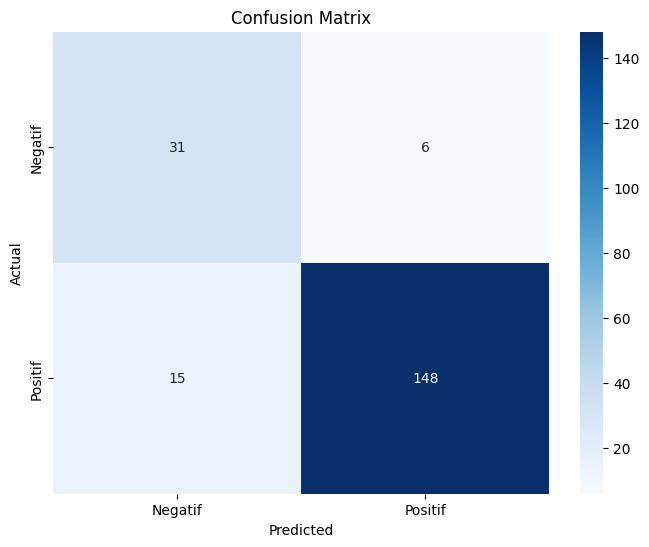

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming 'y_test' and 'predicted' are defined from your previous code
cm = confusion_matrix(y_test, predicted)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negatif', 'Positif'], yticklabels=['Negatif', 'Positif'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

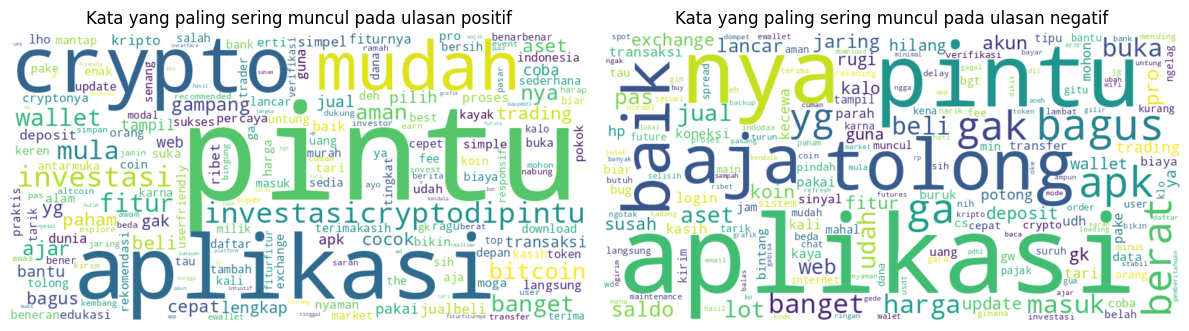

In [84]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

data_clean = pd.read_csv('hasil_TextPreProcessing_pintu.csv')

positive_reviews = data_clean[data_clean['Label'] == 'Positif']['text_steamindo'].astype(str)
negative_reviews = data_clean[data_clean['Label'] == 'Negatif']['text_steamindo'].astype(str)

positive_words = ' '.join(positive_reviews).split()
negative_words = ' '.join(negative_reviews).split()

positive_word_counts = Counter(positive_words)
negative_word_counts = Counter(negative_words)

num_words = 10

top_positive_words = positive_word_counts.most_common(num_words)
top_negative_words = negative_word_counts.most_common(num_words)

wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(positive_word_counts)
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(negative_word_counts)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Kata yang paling sering muncul pada ulasan positif')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Kata yang paling sering muncul pada ulasan negatif')
plt.axis('off')

plt.tight_layout()
plt.show()